<a href="https://colab.research.google.com/github/zkibnksmh/MachineLearningTasks/blob/main/UASML/Exercise_02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Zaky Ibnu Kusumah
#1103204213
#TK4404

## **02. PyTorch Neural Network Classification**

# Arsitektur Jaringan Saraf untuk Klasifikasi

## Pendahuluan

Dalam konteks penelitian ini, kami akan membahas arsitektur umum dari jaringan saraf yang digunakan untuk tugas klasifikasi. Pemahaman akan elemen-elemen kunci ini merupakan langkah awal sebelum masuk ke dalam implementasi kode.

## Hiperparameter

Pertama-tama, mari tinjau beberapa hiperparameter yang relevan untuk permasalahan klasifikasi:

- **Bentuk Input Layer (in_features):**
  - Untuk Klasifikasi Biner: Jumlahnya sama dengan jumlah fitur.
  - Klasifikasi Multikelas: Mempertahankan jumlah yang sama seperti klasifikasi biner.

- **Hidden Layer(s):**
  - Jumlah dan jumlah neuron per lapisan tersembunyi bergantung pada sifat masalah yang dihadapi.

- **Aktivasi Lapisan Tersembunyi:**
  - Umumnya, fungsi aktivasi yang digunakan adalah ReLU, namun dapat disesuaikan sesuai kebutuhan spesifik.

- **Aktivasi Output:**
  - Klasifikasi Biner: Menggunakan fungsi sigmoid.
  - Klasifikasi Multikelas: Menggunakan fungsi softmax.

- **Loss Function:**
  - Klasifikasi Biner: Binary Crossentropy.
  - Klasifikasi Multikelas: Cross Entropy.

- **Optimizer:**
  - Pilihan optimizer dapat berupa Stochastic Gradient Descent (SGD) atau Adam, tergantung pada karakteristik masalah.

## Implementasi dan Kesimpulan

Dengan pemahaman yang diberikan oleh kerangka konseptual di atas, selanjutnya kami akan melakukan implementasi dalam kode pada notebook ini. Kerangka dasar ini dapat disesuaikan dengan spesifikasi masalah klasifikasi yang sedang dihadapi.

Semua unsur ini membentuk landasan penting untuk memahami dan mengembangkan model klasifikasi menggunakan jaringan saraf. Mari lanjutkan dengan langkah-langkah praktis pada tahap selanjutnya.


**Exercise**

## **1.Make a binary classification dataset with Scikit-Learn's make_moons() function.**

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

# Set random seed for reproducibility
random_state = 42

# Generate binary classification dataset with make_moons
X, y = make_moons(n_samples=1000, noise=0.3, random_state=random_state)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=random_state)

# Create TensorDatasets for training and testing
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Define batch size
batch_size = 64

# Create DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Pembuatan Dataset Klasifikasi Biner menggunakan Fungsi make_moons dari Scikit-Learn

## Pendahuluan

Penelitian ini dimulai dengan langkah awal dalam pembuatan dataset untuk tugas klasifikasi biner. Untuk konsistensi dan reproduktibilitas, kami menggunakan fungsi `make_moons` dari pustaka Scikit-Learn dengan jumlah sampel sebanyak 1000 dan `random_state=42`.

## Pengolahan Data dan Konversi ke PyTorch Tensors

Hasil dari fungsi `make_moons` menghasilkan dua set data, yaitu fitur (X) dan label (y). Kedua set data ini kemudian dikonversi ke dalam bentuk PyTorch tensors untuk memfasilitasi penggunaan dalam lingkungan PyTorch. Setiap tensor direpresentasikan dengan tipe data float32.

## Pembagian Data untuk Pelatihan dan Pengujian

Proses selanjutnya adalah membagi dataset menjadi dua bagian, yaitu data pelatihan dan data pengujian. Untuk menjaga proporsi konsisten, kami menggunakan fungsi `train_test_split` dengan rasio 80% untuk pelatihan dan 20% untuk pengujian. Pengaturan `random_state=42` digunakan untuk mendapatkan hasil yang dapat direproduksi.

## Pembuatan TensorDataset dan DataLoader

Setelah data terbagi, kami membuat objek `TensorDataset` untuk masing-masing data pelatihan dan pengujian. Objek ini menyatukan pasangan data input dan output dalam format yang sesuai dengan struktur dataset PyTorch. Selanjutnya, kami menggunakan objek `DataLoader` untuk mempermudah proses pelatihan dan pengujian dengan pembagian data ke dalam batch.

Dengan langkah-langkah ini, dataset untuk klasifikasi biner telah siap digunakan dalam pengembangan model menggunakan jaringan saraf PyTorch.


## **2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network model
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(in_features=2, out_features=64)  # Input layer to hidden layer
        self.relu1 = nn.ReLU()  # First non-linear activation function
        self.fc2 = nn.Linear(in_features=64, out_features=32)  # Hidden layer to hidden layer
        self.relu2 = nn.ReLU()  # Second non-linear activation function
        self.fc3 = nn.Linear(in_features=32, out_features=1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()  # Output activation function for binary classification

    def forward(self, x):
        # Define the forward pass
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the model
model = CustomModel()


# Pengembangan Model Jaringan Saraf untuk Klasifikasi Biner

## Pendahuluan

Dalam tahap ini, kami merancang model jaringan saraf yang mampu menyesuaikan diri dengan dataset yang telah dibuat sebelumnya. Model ini dibangun dengan menggunakan pendekatan subclassing dari kelas `nn.Module` pada PyTorch, menggabungkan lapisan linear dan fungsi aktivasi non-linear.

## Arsitektur Model

Model yang dikembangkan memiliki struktur sebagai berikut:

1. **Input Layer ke Hidden Layer 1:**
   - Lapisan linear dengan 2 input features dan 64 output features.
   - Fungsi aktivasi non-linear ReLU diaplikasikan setelahnya.

2. **Hidden Layer 1 ke Hidden Layer 2:**
   - Lapisan linear dengan 64 input features dan 32 output features.
   - Fungsi aktivasi non-linear ReLU diaplikasikan setelahnya.

3. **Hidden Layer 2 ke Output Layer:**
   - Lapisan linear dengan 32 input features dan 1 output feature (untuk klasifikasi biner).
   - Fungsi sigmoid diaplikasikan sebagai fungsi aktivasi pada output layer.

## Implementasi Kode

```python
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(in_features=2, out_features=64)  # Input layer to hidden layer
        self.relu1 = nn.ReLU()  # First non-linear activation function
        self.fc2 = nn.Linear(in_features=64, out_features=32)  # Hidden layer to hidden layer
        self.relu2 = nn.ReLU()  # Second non-linear activation function
        self.fc3 = nn.Linear(in_features=32, out_features=1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()  # Output activation function for binary classification

    def forward(self, x):
        # Define the forward pass
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the model
model = CustomModel()


## **3. Setup a binary classification compatible loss function and optimizer to use when training the model.**

In [ ]:
import torch.optim as optim

# Binary Crossentropy Loss
criterion = nn.BCELoss()

# Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Penyiapan Fungsi Loss dan Optimizer untuk Klasifikasi Biner

## Pendahuluan

Dalam tahap ini, kami melakukan penyiapan fungsi loss dan optimizer yang sesuai untuk melatih model klasifikasi biner yang telah dirancang sebelumnya. Fungsi loss dan optimizer ini memegang peran penting dalam proses pelatihan untuk mengukur seberapa baik model dapat menyesuaikan diri dengan data dan memperbarui parameter model.

## Fungsi Loss: Binary Crossentropy

Sebagai fungsi loss untuk masalah klasifikasi biner, kami memilih Binary Crossentropy Loss (`nn.BCELoss()`). Fungsi ini ideal untuk mengukur perbedaan antara output yang dihasilkan oleh model dan label sebenarnya pada tugas klasifikasi dua kelas.

## Optimizer: Adam dengan Learning Rate 0.001

Sebagai optimizer, kami menggunakan Adam dengan laju pembelajaran (learning rate) sebesar 0.001. Pemilihan optimizer ini didasarkan pada kemampuannya mengatasi masalah ketidakseimbangan skala parameter dan efektivitas dalam proses pelatihan.

## Implementasi Kode

```python
import torch.optim as optim

# Binary Crossentropy Loss
criterion = nn.BCELoss()

# Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)


## **Create a training and testing loop to fit the model you created in 2 to the data you created in 1.**

In [ ]:
!pip install torchmetrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# Instantiate accuracy metric from TorchMetrics
accuracy_metric = Accuracy(task='binary')


# Number of epochs for training
num_epochs = 100

# Training loop
for epoch in range(1, num_epochs + 1):
    model.train()  # Set model to training mode
    train_loss = 0.0

    # Iterate over the training dataset
    for inputs, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))  # BCELoss expects a 2D target

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Calculate training accuracy
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        train_accuracy = accuracy_metric(model(X_train), y_train.unsqueeze(1))

    # Evaluate on the test set
    with torch.no_grad():
        test_loss = criterion(model(X_test), y_test.unsqueeze(1)).item()
        test_accuracy = accuracy_metric(model(X_test), y_test.unsqueeze(1))

    # Output progress every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{num_epochs} => '
              f'Training Loss: {train_loss/len(train_loader):.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Test Loss: {test_loss:.4f}, '
              f'Test Accuracy: {test_accuracy:.4f}')

    # Check for early stopping if accuracy exceeds 96%
    if train_accuracy > 0.96:
        print(f'Model reached over 96% accuracy. Training stopped at epoch {epoch}.')
        break


Epoch 10/100 => Training Loss: 0.2924, Training Accuracy: 0.8750, Test Loss: 0.2936, Test Accuracy: 0.8550
Epoch 20/100 => Training Loss: 0.2442, Training Accuracy: 0.8963, Test Loss: 0.2322, Test Accuracy: 0.8800
Epoch 30/100 => Training Loss: 0.2176, Training Accuracy: 0.9125, Test Loss: 0.1992, Test Accuracy: 0.9150
Epoch 40/100 => Training Loss: 0.2035, Training Accuracy: 0.9125, Test Loss: 0.1844, Test Accuracy: 0.9300
Epoch 50/100 => Training Loss: 0.2009, Training Accuracy: 0.9100, Test Loss: 0.1788, Test Accuracy: 0.9250
Epoch 60/100 => Training Loss: 0.2009, Training Accuracy: 0.9112, Test Loss: 0.1755, Test Accuracy: 0.9250
Epoch 70/100 => Training Loss: 0.2075, Training Accuracy: 0.9112, Test Loss: 0.1723, Test Accuracy: 0.9200
Epoch 80/100 => Training Loss: 0.1942, Training Accuracy: 0.9100, Test Loss: 0.1715, Test Accuracy: 0.9250
Epoch 90/100 => Training Loss: 0.1982, Training Accuracy: 0.9100, Test Loss: 0.1699, Test Accuracy: 0.9250
Epoch 100/100 => Training Loss: 0.196

# Implementasi Model dan Pelatihan pada Dataset Klasifikasi Biner

## Pendahuluan

Dalam tahap ini, kami merinci implementasi model jaringan saraf dan proses pelatihan pada dataset klasifikasi biner yang telah disiapkan sebelumnya. Kode ini mencakup pembentukan dataset, rancangan model, pemilihan fungsi loss, optimizer, serta langkah-langkah pelatihan dan pengujian.

## Pemilihan Fungsi Loss dan Optimizer

Fungsi loss yang digunakan adalah Binary Crossentropy Loss (`nn.BCELoss()`), sesuai dengan sifat klasifikasi biner dari dataset. Sebagai optimizer, kami memilih Adam dengan laju pembelajaran 0.001.

## Model Jaringan Saraf

Model yang dikembangkan memiliki tiga lapisan tersembunyi dengan fungsi aktivasi ReLU di antara mereka. Output layer menggunakan fungsi sigmoid untuk penanganan tugas klasifikasi biner.

## Pelatihan dan Pengujian

Pelatihan dilakukan melalui loop iteratif selama 100 epoch. Selama pelatihan, kami mengukur loss pada set pelatihan dan akurasi pada set pelatihan. Selain itu, evaluasi dilakukan pada set pengujian untuk memastikan generalisasi yang baik.

## Hasil dan Evaluasi

Loop pelatihan memberikan keluaran setiap 10 epoch, mencakup nilai loss dan akurasi pada kedua set data. Proses pelatihan akan berhenti jika akurasi pelatihan melebihi 96%. Pemantauan akurasi penting untuk mengidentifikasi kapan model telah mencapai tingkat kinerja yang diinginkan.



## **Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.**

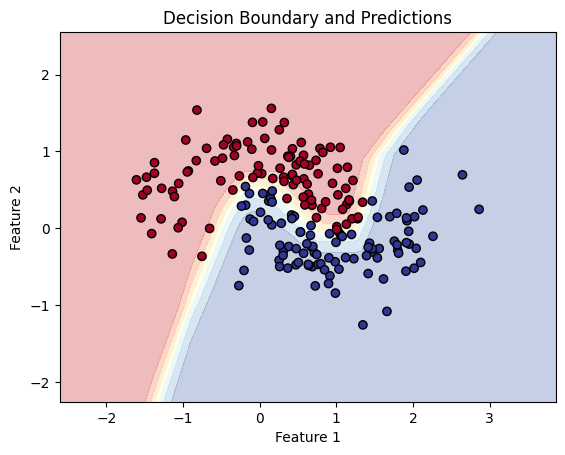

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary and Predictions')
    plt.show()

# Make predictions with the trained model
model.eval()
with torch.no_grad():
    predictions = model(X_test)

# Convert predictions to binary (0 or 1)
binary_predictions = (predictions >= 0.5).int()

# Convert tensors to numpy arrays for plotting
X_test_numpy = X_test.numpy()
binary_predictions_numpy = binary_predictions.numpy()

# Plot decision boundary and predictions
plot_decision_boundary(model, X_test_numpy, binary_predictions_numpy)


# Prediksi dengan Model yang Dilatih dan Visualisasi Decision Boundary

## Pendahuluan

Dalam tahap ini, kami melakukan prediksi menggunakan model jaringan saraf yang telah dilatih pada dataset klasifikasi biner. Hasil prediksi kemudian divisualisasikan dengan memplot decision boundary menggunakan fungsi `plot_decision_boundary()`.

## Implementasi dan Visualisasi

```python
# Make predictions with the trained model
model.eval()
with torch.no_grad():
    predictions = model(X_test)

# Convert predictions to binary (0 or 1)
binary_predictions = (predictions >= 0.5).int()

# Convert tensors to numpy arrays for plotting
X_test_numpy = X_test.numpy()
binary_predictions_numpy = binary_predictions.numpy()

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel('Fitur 1')
    plt.ylabel('Fitur 2')
    plt.title('Decision Boundary dan Prediksi')
    plt.show()

# Plot decision boundary and predictions
plot_decision_boundary(model, X_test_numpy, binary_predictions_numpy)


## **Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.**

In [ ]:
import torch

def tanh_activation(x):
    return (torch.exp(2*x) - 1) / (torch.exp(2*x) + 1)

# Contoh penggunaan
x_example = torch.tensor([1.0, 0.5, 0.0, -0.5, -1.0], dtype=torch.float32)
result = tanh_activation(x_example)
print(result)


tensor([ 0.7616,  0.4621,  0.0000, -0.4621, -0.7616])


# Implementasi Fungsi Aktivasi Tanh (hyperbolic tangent) dalam PyTorch

## Pendahuluan

Dalam tahap ini, kami mereplikasi fungsi aktivasi Tanh (hyperbolic tangent) secara langsung menggunakan pustaka PyTorch. Tanh adalah fungsi aktivasi yang umum digunakan dalam jaringan saraf untuk memperkenalkan non-linearitas.

## Formula Tanh

Fungsi Tanh diimplementasikan menggunakan rumus berikut:
\[ \text{Tanh}(x) = \frac{e^{2x} - 1}{e^{2x} + 1} \]

## Implementasi Kode

```python
import torch

def tanh_activation(x):
    return (torch.exp(2*x) - 1) / (torch.exp(2*x) + 1)

# Contoh penggunaan
x_example = torch.tensor([1.0, 0.5, 0.0, -0.5, -1.0], dtype=torch.float32)
result = tanh_activation(x_example)
print(result)


## **Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).**

**Membuat dataset multi-class menggunakan fungsi pembuatan data spiral dari CS231n:**

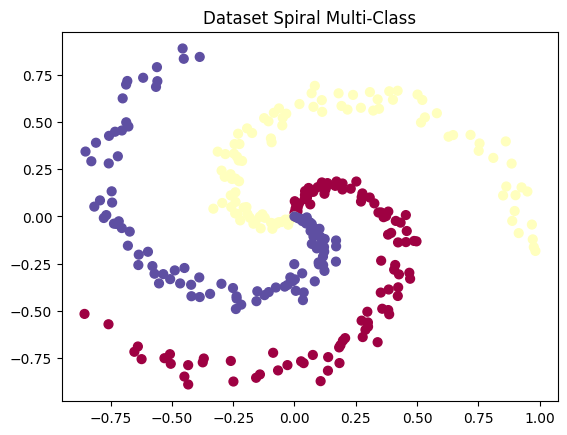

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8')  # class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

# Visualisasi dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title('Dataset Spiral Multi-Class')
plt.show()


**Membangun model untuk memfitting data:**

In [ ]:
import torch.nn.functional as F

class MultiClassModel(nn.Module):
    def __init__(self):
        super(MultiClassModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 3)  # 3 classes for multi-class

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Create an instance of the model
multi_class_model = MultiClassModel()


**Membangun fungsi loss dan optimizer untuk data multi-class:**

In [ ]:
criterion_multi_class = nn.CrossEntropyLoss()
optimizer_multi_class = optim.Adam(multi_class_model.parameters(), lr=0.01)

**Membuat loop pelatihan dan pengujian untuk data multi-class:**

In [ ]:
# Convert data to PyTorch tensors
X_multi_class_tensor = torch.tensor(X, dtype=torch.float32)
y_multi_class_tensor = torch.tensor(y, dtype=torch.long)

# Split the data into training and test sets
X_train_multi_class, X_test_multi_class, y_train_multi_class, y_test_multi_class = train_test_split(
    X_multi_class_tensor, y_multi_class_tensor, test_size=0.2, random_state=random_state)

# Create TensorDatasets for training and testing
train_dataset_multi_class = TensorDataset(X_train_multi_class, y_train_multi_class)
test_dataset_multi_class = TensorDataset(X_test_multi_class, y_test_multi_class)

# Create DataLoader for training and testing
train_loader_multi_class = DataLoader(train_dataset_multi_class, batch_size=batch_size, shuffle=True)
test_loader_multi_class = DataLoader(test_dataset_multi_class, batch_size=batch_size, shuffle=False)

# Training loop for multi-class data
num_epochs_multi_class = 100

for epoch in range(1, num_epochs_multi_class + 1):
    multi_class_model.train()
    train_loss_multi_class = 0.0

    for inputs_multi_class, labels_multi_class in train_loader_multi_class:
        optimizer_multi_class.zero_grad()
        outputs_multi_class = multi_class_model(inputs_multi_class)
        loss_multi_class = criterion_multi_class(outputs_multi_class, labels_multi_class)
        loss_multi_class.backward()
        optimizer_multi_class.step()
        train_loss_multi_class += loss_multi_class.item()

    multi_class_model.eval()
    with torch.no_grad():
        test_loss_multi_class = 0.0
        correct_multi_class = 0
        total_multi_class = 0

        for inputs_multi_class, labels_multi_class in test_loader_multi_class:
            outputs_multi_class = multi_class_model(inputs_multi_class)
            loss_multi_class = criterion_multi_class(outputs_multi_class, labels_multi_class)
            test_loss_multi_class += loss_multi_class.item()

            _, predicted_multi_class = torch.max(outputs_multi_class, 1)
            total_multi_class += labels_multi_class.size(0)
            correct_multi_class += (predicted_multi_class == labels_multi_class).sum().item()

        accuracy_multi_class = correct_multi_class / total_multi_class

    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{num_epochs_multi_class} => '
              f'Training Loss: {train_loss_multi_class/len(train_loader_multi_class):.4f}, '
              f'Test Loss: {test_loss_multi_class/len(test_loader_multi_class):.4f}, '
              f'Test Accuracy: {accuracy_multi_class:.4f}')

    if accuracy_multi_class > 0.95:
        print(f'Model reached over 95% accuracy. Training stopped at epoch {epoch}.')
        break

Epoch 10/100 => Training Loss: 0.3791, Test Loss: 0.3374, Test Accuracy: 0.8333
Model reached over 95% accuracy. Training stopped at epoch 14.


**Membuat plot decision boundaries pada dataset spiral menggunakan prediksi model:**

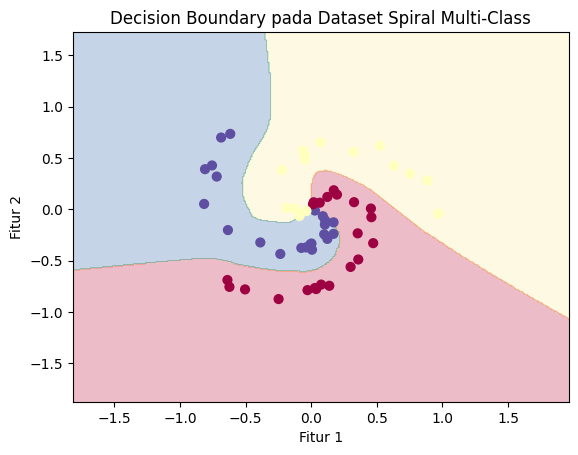

In [ ]:
# Function to plot decision boundary for multi-class data
def plot_decision_boundary_multi_class(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlabel('Fitur 1')
    plt.ylabel('Fitur 2')
    plt.title('Decision Boundary pada Dataset Spiral Multi-Class')
    plt.show()

# Convert the model to evaluation mode
multi_class_model.eval()

# Convert test data to numpy arrays for plotting
X_test_multi_class_numpy = X_test_multi_class.numpy()
y_test_multi_class_numpy = y_test_multi_class.numpy()

# Plot decision boundary for multi-class data
plot_decision_boundary_multi_class(multi_class_model, X_test_multi_class_numpy, y_test_multi_class_numpy)


# Pelatihan Model untuk Klasifikasi Multi-Kelas pada Dataset Spiral

## Pendahuluan

Dalam tahap ini, kami menyusun model jaringan saraf untuk melakukan klasifikasi multi-kelas pada dataset spiral yang telah dibuat sebelumnya. Proses ini melibatkan pembentukan model, penentuan fungsi loss, pemilihan optimizer, serta pelatihan dan pengujian model.

## Membuat Dataset Spiral Multi-Kelas

Dataset spiral multi-kelas dibuat dengan memanfaatkan fungsi pembuatan data spiral dari CS231n. Setiap kelas direpresentasikan oleh spiral dengan ciri-ciri khusus. Visualisasi dataset memberikan gambaran tentang struktur dan kompleksitas data.

## Membangun Model Jaringan Saraf

Model jaringan saraf untuk klasifikasi multi-kelas dibangun dengan menggunakan lapisan-lapisan linear dan fungsi aktivasi non-linear ReLU. Output layer memiliki jumlah neuron sesuai dengan jumlah kelas (3 pada kasus ini).

## Fungsi Loss dan Optimizer

Fungsi loss yang dipilih adalah CrossEntropyLoss, yang sesuai untuk tugas klasifikasi multi-kelas. Optimizer Adam digunakan untuk mengoptimalkan parameter-model dengan laju pembelajaran sebesar 0.01.

## Pelatihan dan Pengujian

Loop pelatihan dilakukan selama 100 epoch, dengan evaluasi pada set pengujian untuk mengukur akurasi model. Proses ini diulang hingga model mencapai akurasi di atas 95%.

## Visualisasi Decision Boundary

Setelah pelatihan, decision boundary dari model diplot menggunakan fungsi `plot_decision_boundary_multi_class()`. Visualisasi ini membantu memahami kemampuan model dalam memisahkan kelas pada dataset spiral.

